In [2]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai fastbook

In [3]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

In [4]:
urls = search_images('lion photos', max_images=1)
urls[0]

Searching for 'lion photos'


'https://wallpapertag.com/wallpaper/full/8/2/f/744667-male-lion-faces-wallpaper-2048x1423-for-meizu.jpg'

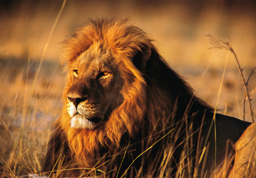

In [ ]:
from fastdownload import download_url
dest = 'lion.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
Image.open(dest).to_thumb(256,256)

Searching for 'tiger photos'


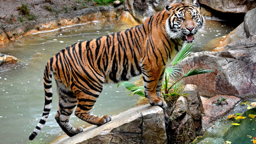

In [6]:
download_url(search_images('tiger photos', max_images=1)[0], 'tiger.jpg', show_progress=False)
Image.open('tiger.jpg').to_thumb(256,256)

In [7]:
searches = 'lion','tiger'
path = Path('lion_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'lion photo'
Searching for 'tiger photo'


In [8]:
# Some photos might not download correctly which could cause our model training to
# fail, so we'll remove them
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [10]:
dls = DataBlock(
    # image input, category output
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    # 20% validation set
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    # 2 alternatives: squish, crop
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32) # batch size 32

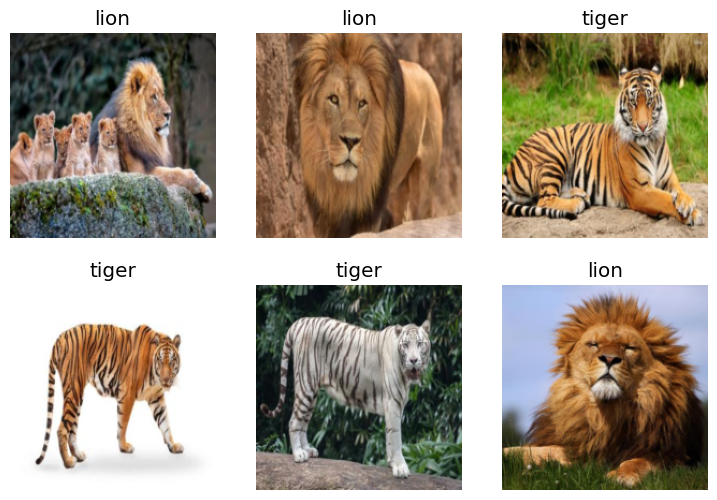

In [11]:
dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.945138,0.481174,0.300000,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.980435,0.174257,0.100000,00:00
1,0.729970,0.006865,0.000000,00:00
2,0.516275,0.001344,0.000000,00:00


This is: lion.
Probability it's a lion: 0.9981


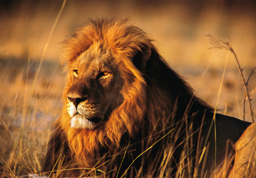

In [13]:
# string (lion/ not lion), int (lion/ not lion), probability
lion_path = 'lion.jpg'
is_lion, _, probs = learn.predict(PILImage.create(lion_path))
print(f"This is: {is_lion}.")
print(f"Probability it's a lion: {probs[0]:.4f}")

Image.open(lion_path).to_thumb(256,256)